In [2]:
import matplotlib.pyplot as plt

import requests
import json

import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup



In [4]:
studentmail='94093970@fsv.cuni.cz'

In [5]:
studentnumber=94093970

In [6]:
#TASK1
page = requests.get('https://en.wikipedia.org/wiki/FTSE_100_Index')

In [10]:
soup = BeautifulSoup(page.text)

In [11]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>FTSE 100 Index - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fcab41f9-5ba6-43e8-bbb1-8b58c8e8ac4c","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"FTSE_100_Index","wgTitle":"FTSE 100 Index","wgCurRevisionId":989050793,"wgRevisionId":989050793,"wgArticleId":497717,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All articles with dead external links","Articles with dead external links from December 2016","Articles with permanently dead exter

In [27]:
const_table=soup.find('table',{"id":'constituents'})

In [28]:
print(const_table)

<table class="wikitable sortable" id="constituents">
<tbody><tr>
<th>Company</th>
<th>EPIC</th>
<th>FTSE Industry Classification Benchmark sector<sup class="reference" id="cite_ref-12"><a href="#cite_note-12">[12]</a></sup>
</th></tr>
<tr>
<td><a href="/wiki/3i" title="3i">3i</a></td>
<td>III</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Admiral_Group" title="Admiral Group">Admiral Group</a></td>
<td>ADM</td>
<td>Nonlife Insurance
</td></tr>
<tr>
<td><a href="/wiki/Anglo_American_plc" title="Anglo American plc">Anglo American plc</a></td>
<td>AAL</td>
<td>Mining
</td></tr>
<tr>
<td><a href="/wiki/Antofagasta_PLC" title="Antofagasta PLC">Antofagasta</a></td>
<td>ANTO</td>
<td>Mining
</td></tr>
<tr>
<td><a href="/wiki/Ashtead_Group" title="Ashtead Group">Ashtead Group</a></td>
<td>AHT</td>
<td>Support Services
</td></tr>
<tr>
<td><a href="/wiki/Associated_British_Foods" title="Associated British Foods">Associated British Foods</a></td>
<td>ABF</td>
<td>Food Producers
</t

In [32]:
#ignore just an error

NameError: name 'th' is not defined

In [59]:
output_rows = []
for table_row in const_table.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)

In [61]:
#output_rows = [output_row.replace('\\n', '')  for output_row in output_rows]

In [62]:
output_rows

[[],
 ['3i', 'III', 'Financial Services\n'],
 ['Admiral Group', 'ADM', 'Nonlife Insurance\n'],
 ['Anglo American plc', 'AAL', 'Mining\n'],
 ['Antofagasta', 'ANTO', 'Mining\n'],
 ['Ashtead Group', 'AHT', 'Support Services\n'],
 ['Associated British Foods', 'ABF', 'Food Producers\n'],
 ['AstraZeneca', 'AZN', 'Pharmaceuticals & Biotechnology\n'],
 ['Auto Trader Group', 'AUTO', 'Media\n'],
 ['Avast', 'AVST', 'Software and Computer Services\n'],
 ['Aveva', 'AVV', 'Software & Computer Services\n'],
 ['Aviva', 'AV.', 'Life Insurance\n'],
 ['B&M', 'BME', 'Retailers\n'],
 ['BAE Systems', 'BA.', 'Aerospace & Defence\n'],
 ['Barclays', 'BARC', 'Banks\n'],
 ['Barratt Developments', 'BDEV', 'Household Goods & Home Construction\n'],
 ['Berkeley Group Holdings', 'BKG', 'Household Goods & Home Construction\n'],
 ['BHP', 'BHP', 'Mining\n'],
 ['BP', 'BP.', 'Oil & Gas Producers\n'],
 ['British American Tobacco', 'BATS', 'Tobacco\n'],
 ['British Land', 'BLND', 'Real Estate Investment Trusts\n'],
 ['BT Gro

In [64]:
df_table=pd.DataFrame(output_rows)

In [65]:
df_table

,0,1,2
0,None,None,None
1,3i,III,Financial Services\n
2,Admiral Group,ADM,Nonlife Insurance\n
3,Anglo American plc,AAL,Mining\n
4,Antofagasta,ANTO,Mining\n
...,...,...,...
96,Unilever,ULVR,Personal Goods\n
97,United Utilities,UU.,"Gas, Water & Multi-utilities\n"
98,Vodafone Group,VOD,Mobile Telecommunications\n
99,Whitbread,WTB,Retail hospitality\n


In [67]:
df = df_table.iloc[1:]

In [68]:
df

,0,1,2
1,3i,III,Financial Services\n
2,Admiral Group,ADM,Nonlife Insurance\n
3,Anglo American plc,AAL,Mining\n
4,Antofagasta,ANTO,Mining\n
5,Ashtead Group,AHT,Support Services\n
...,...,...,...
96,Unilever,ULVR,Personal Goods\n
97,United Utilities,UU.,"Gas, Water & Multi-utilities\n"
98,Vodafone Group,VOD,Mobile Telecommunications\n
99,Whitbread,WTB,Retail hospitality\n


In [76]:
df = df.replace('\\n','')

In [77]:
df

,0,1,2
1,3i,III,Financial Services
2,NaN,Financial Services,Nonlife Insurance
3,Anglo American plc,AAL,Mining
4,Antofagasta,ANTO,Mining
5,Ashtead Group,AHT,Support Services
...,...,...,...
96,Unilever,ULVR,Personal Goods
97,United Utilities,UU.,"Gas, Water & Multi-utilities"
98,Vodafone Group,VOD,Mobile Telecommunications
99,Whitbread,WTB,Retail hospitality


In [0]:
#Task2

In [183]:
# a Python object (dict):
# a Python object (dict):
x = {
  "cuni": "94093970",
}
# convert into JSON:
y = json.dumps(x)

# JSON string:
print(y)

{"cuni": "94093970"}


In [103]:
#ignore this error

<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-103-705ae70caba5>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  age2= requests.get('https://ies-midterm.soulution.rocks/login'(y))


TypeError: 'str' object is not callable

In [209]:
url='https://ies-midterm.soulution.rocks/login'

In [199]:
x = requests.post(url, data = y)

In [200]:
print(x)

<Response [200]>


In [205]:
z= x.text
print(z)

{"data": {"personal_code": "4a2ecd7269", "dataset_ids": [["7be200ce5b", "5aa21103e8", "557b58dd1d", "81395feb08", "fc1e690fcf"]]}, "message": "Hello, Ghauss Arash IN! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook."}


In [214]:
url1='https://ies-midterm.soulution.rocks/data/7be200ce5b'
part1 = requests.get(url1)

In [237]:
SVT=part1.text
print(SVT)

{"data": {"company": "SVT", "data": [{"Date": "2019-01-02", "Open": "10.149999618530273", "High": "12.109999656677246", "Low": "10.039999961853027", "Close": "11.520000457763672", "Adj.Close": "11.331148147583008", "Volume": "18900"}, {"Date": "2019-01-03", "Open": "11.510000228881836", "High": "11.520000457763672", "Low": "11.09000015258789", "Close": "11.09000015258789", "Adj.Close": "10.908197402954102", "Volume": "2700"}, {"Date": "2019-01-04", "Open": "11.399999618530273", "High": "11.399999618530273", "Low": "11.170000076293945", "Close": "11.170000076293945", "Adj.Close": "10.986885070800781", "Volume": "2600"}, {"Date": "2019-01-07", "Open": "11.170000076293945", "High": "11.170000076293945", "Low": "11.170000076293945", "Close": "11.170000076293945", "Adj.Close": "10.986885070800781", "Volume": "100"}, {"Date": "2019-01-08", "Open": "11.170000076293945", "High": "11.170000076293945", "Low": "11.170000076293945", "Close": "11.170000076293945", "Adj.Close": "10.986885070800781",

In [247]:
url3='https://ies-midterm.soulution.rocks/data/5aa21103e8'
part2 = requests.get(url2)
AZN=part2.text

In [220]:
part3

<Response [200]>

In [221]:
part3.text

'{"data": {"company": "AZN", "data": [{"Date": "2019-01-02", "Open": "37.720001220703125", "High": "38.0", "Low": "37.59000015258789", "Close": "37.79999923706055", "Adj.Close": "35.55956268310547", "Volume": "3594000"}, {"Date": "2019-01-03", "Open": "38.380001068115234", "High": "38.84000015258789", "Low": "38.310001373291016", "Close": "38.33000183105469", "Adj.Close": "36.05815505981445", "Volume": "5013500"}, {"Date": "2019-01-04", "Open": "38.81999969482422", "High": "39.380001068115234", "Low": "38.68000030517578", "Close": "39.18000030517578", "Adj.Close": "36.8577766418457", "Volume": "2854000"}, {"Date": "2019-01-07", "Open": "39.0", "High": "39.13999938964844", "Low": "38.70000076293945", "Close": "38.779998779296875", "Adj.Close": "36.481483459472656", "Volume": "5738700"}, {"Date": "2019-01-08", "Open": "38.380001068115234", "High": "38.58000183105469", "Low": "38.029998779296875", "Close": "38.130001068115234", "Adj.Close": "35.8700065612793", "Volume": "4697400"}, {"Date

In [252]:
url2='https://ies-midterm.soulution.rocks/data/557b58dd1d'
part2 = requests.get(url2)
part2.text

'{"data": {"company": "AZN", "data": [{"Date": "2019-01-02", "Open": "37.720001220703125", "High": "38.0", "Low": "37.59000015258789", "Close": "37.79999923706055", "Adj.Close": "35.55956268310547", "Volume": "3594000"}, {"Date": "2019-01-03", "Open": "38.380001068115234", "High": "38.84000015258789", "Low": "38.310001373291016", "Close": "38.33000183105469", "Adj.Close": "36.05815505981445", "Volume": "5013500"}, {"Date": "2019-01-04", "Open": "38.81999969482422", "High": "39.380001068115234", "Low": "38.68000030517578", "Close": "39.18000030517578", "Adj.Close": "36.8577766418457", "Volume": "2854000"}, {"Date": "2019-01-07", "Open": "39.0", "High": "39.13999938964844", "Low": "38.70000076293945", "Close": "38.779998779296875", "Adj.Close": "36.481483459472656", "Volume": "5738700"}, {"Date": "2019-01-08", "Open": "38.380001068115234", "High": "38.58000183105469", "Low": "38.029998779296875", "Close": "38.130001068115234", "Adj.Close": "35.8700065612793", "Volume": "4697400"}, {"Date

'{"data": {}, "message": "Error [503] - Sorry, I just slipped and fell. Thank God, I am made of silicon. You need to work this out."}'

In [227]:
url3='https://ies-midterm.soulution.rocks/data/81395feb08'
part3 = requests.get(url3)
part3.text

'{"data": {"company": "CCH", "data": [{"Date": "2019-01-02", "Open": "9.649999618530273", "High": "9.649999618530273", "Low": "9.640000343322754", "Close": "9.649999618530273", "Adj.Close": "9.623074531555176", "Volume": "500"}, {"Date": "2019-01-03", "Open": "9.630000114440918", "High": "9.630000114440918", "Low": "9.630000114440918", "Close": "9.630000114440918", "Adj.Close": "9.603131294250488", "Volume": "1700"}, {"Date": "2019-01-04", "Open": "9.640000343322754", "High": "9.640000343322754", "Low": "9.640000343322754", "Close": "9.640000343322754", "Adj.Close": "9.613102912902832", "Volume": "1500"}, {"Date": "2019-01-07", "Open": "9.640000343322754", "High": "9.640000343322754", "Low": "9.640000343322754", "Close": "9.640000343322754", "Adj.Close": "9.613102912902832", "Volume": "1000"}, {"Date": "2019-01-08", "Open": "9.630000114440918", "High": "9.630000114440918", "Low": "9.630000114440918", "Close": "9.630000114440918", "Adj.Close": "9.603131294250488", "Volume": "186600"}, {

In [228]:
url4='https://ies-midterm.soulution.rocks/data/fc1e690fcf'
part4 = requests.get(url4)
part4.text

'{"data": {"company": "NWG", "data": [{"Date": "2019-01-02", "Open": "5.389999866485596", "High": "5.519999980926514", "Low": "5.380000114440918", "Close": "5.510000228881836", "Adj.Close": "5.151330471038818", "Volume": "1257100"}, {"Date": "2019-01-03", "Open": "5.46999979019165", "High": "5.46999979019165", "Low": "5.369999885559082", "Close": "5.409999847412109", "Adj.Close": "5.057839393615723", "Volume": "912400"}, {"Date": "2019-01-04", "Open": "5.570000171661377", "High": "5.710000038146973", "Low": "5.559999942779541", "Close": "5.679999828338623", "Adj.Close": "5.3102641105651855", "Volume": "760400"}, {"Date": "2019-01-07", "Open": "5.730000019073486", "High": "5.809999942779541", "Low": "5.710000038146973", "Close": "5.760000228881836", "Adj.Close": "5.385056972503662", "Volume": "771900"}, {"Date": "2019-01-08", "Open": "5.78000020980835", "High": "5.829999923706055", "Low": "5.760000228881836", "Close": "5.820000171661377", "Adj.Close": "5.441151142120361", "Volume": "814

In [232]:
url5='https://ies-midterm.soulution.rocks/data/fc1e690fcf'
part5 = requests.get(url5)
part5.text

'{"data": {"company": "NWG", "data": [{"Date": "2019-01-02", "Open": "5.389999866485596", "High": "5.519999980926514", "Low": "5.380000114440918", "Close": "5.510000228881836", "Adj.Close": "5.151330471038818", "Volume": "1257100"}, {"Date": "2019-01-03", "Open": "5.46999979019165", "High": "5.46999979019165", "Low": "5.369999885559082", "Close": "5.409999847412109", "Adj.Close": "5.057839393615723", "Volume": "912400"}, {"Date": "2019-01-04", "Open": "5.570000171661377", "High": "5.710000038146973", "Low": "5.559999942779541", "Close": "5.679999828338623", "Adj.Close": "5.3102641105651855", "Volume": "760400"}, {"Date": "2019-01-07", "Open": "5.730000019073486", "High": "5.809999942779541", "Low": "5.710000038146973", "Close": "5.760000228881836", "Adj.Close": "5.385056972503662", "Volume": "771900"}, {"Date": "2019-01-08", "Open": "5.78000020980835", "High": "5.829999923706055", "Low": "5.760000228881836", "Close": "5.820000171661377", "Adj.Close": "5.441151142120361", "Volume": "814

In [244]:
df1 = pd.DataFrame(data=part3)

In [245]:
df1


,0
0,"b'{""data"": {""company"": ""CCH"", ""data"": [{""Date""..."
1,"b'640000343322754"", ""Close"": ""9.64999961853027..."
2,"b'"": ""9.630000114440918"", ""High"": ""9.630000114..."
3,"b'03131294250488"", ""Volume"": ""1700""}, {""Date"":..."
4,"b'40000343322754"", ""Close"": ""9.640000343322754..."
...,...
708,"b'939453"", ""High"": ""19.239999771118164"", ""Low""..."
709,"b'2"", ""Volume"": ""756785""}, {""Date"": ""2020-11-1..."
710,"b'e"": ""19.100000381469727"", ""Adj.Close"": ""19.1..."
711,"b'7344"", ""High"": ""19.5"", ""Low"": ""19.0699996948..."


{'data': {}, 'message': 'Error [400] - No data set with id %7B200%7D found!'}

<Response [400]>

In [122]:
r

<Response [400]>

In [176]:
url2='https://ies-midterm.soulution.rocks/data/{200}'

In [177]:
r = requests.get(url2)

In [178]:
r

<Response [404]>

In [118]:
x = requests.get(url2)

In [119]:
x

<Response [404]>

<Response [403]>

In [75]:
page2

<Response [403]>

In [72]:
print(page2)

<Response [403]>


None


In [0]:
#Task3

In [120]:
df

,0,1,2
1,3i,III,Financial Services
2,NaN,Financial Services,Nonlife Insurance
3,Anglo American plc,AAL,Mining
4,Antofagasta,ANTO,Mining
5,Ashtead Group,AHT,Support Services
...,...,...,...
96,Unilever,ULVR,Personal Goods
97,United Utilities,UU.,"Gas, Water & Multi-utilities"
98,Vodafone Group,VOD,Mobile Telecommunications
99,Whitbread,WTB,Retail hospitality


In [150]:
df[2].value_counts().idxmax()

'Support Services'

In [151]:
df[2].value_counts().idxmin()

'Industrial Metals & Mining'

In [156]:
import matplotlib.pyplot as plt

In [158]:
#ignore

<bound method hist_series of 1                Financial Services
2                 Nonlife Insurance
3                            Mining
4                            Mining
5                  Support Services
                   ...             
96                   Personal Goods
97     Gas, Water & Multi-utilities
98        Mobile Telecommunications
99               Retail hospitality
100                           Media
Name: 2, Length: 100, dtype: object>

<AxesSubplot:>

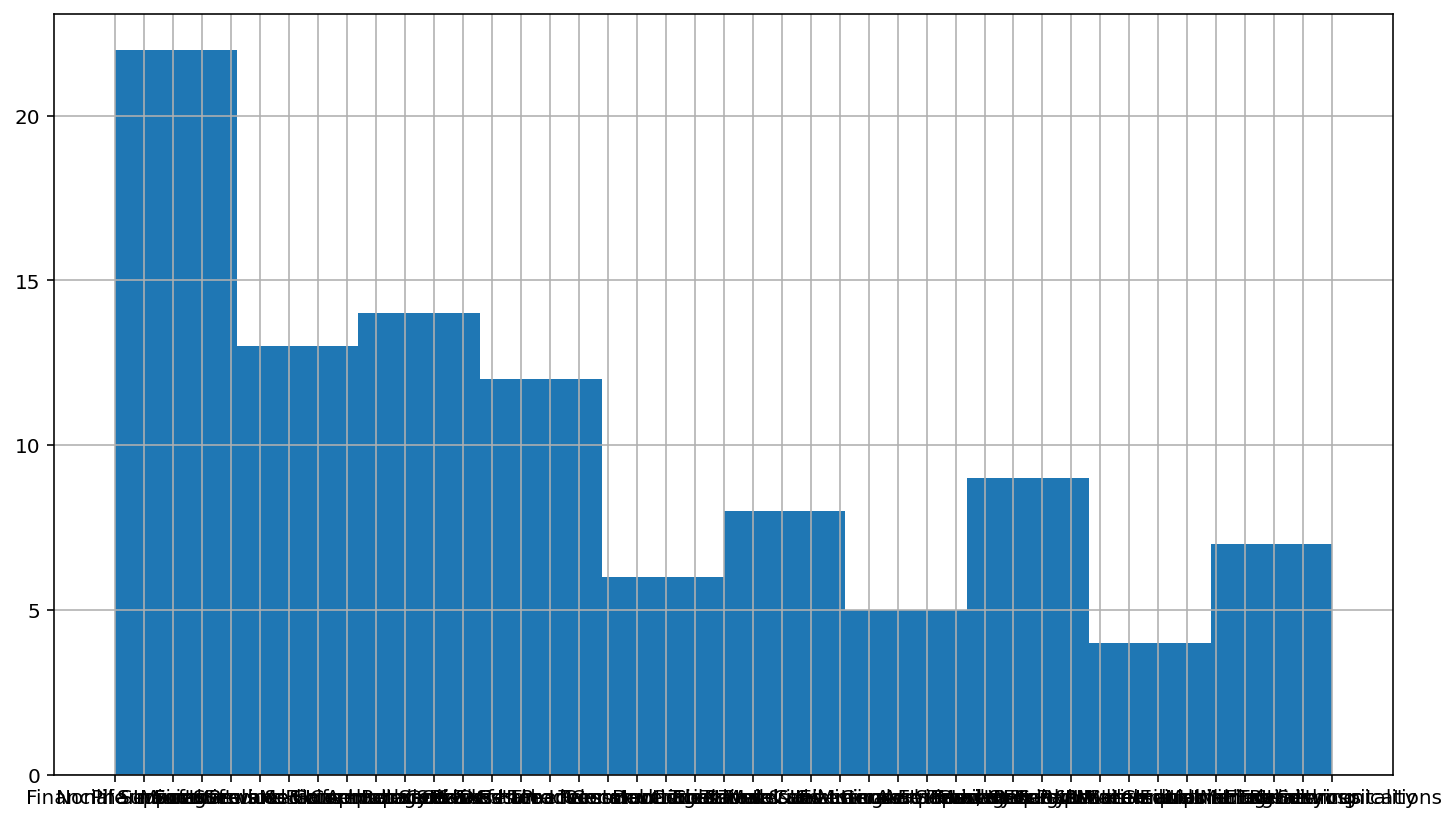

In [166]:
df[2].hist()